In [3]:
import os
from datetime import datetime
from tqdm import notebook
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from collections import Counter

from constants import DATA_DIR, SEASONS

pd.set_option('display.max_columns', 500)

# Explore Datasets

In [14]:
df = pd.read_csv(f'{DATA_DIR}/Credits/2020-21.csv')[['NAME', 'POS', 'PDK', 'CR', 'PLUS']]
C_df = df.loc[df.POS == 'C']
G_df = df.loc[df.POS == 'G']
F_df = df.loc[df.POS == 'F']

bins_CR = [x for x in range(4, 26)]
bins_PLUS = [x*0.1 for x in range(-10, 15)]

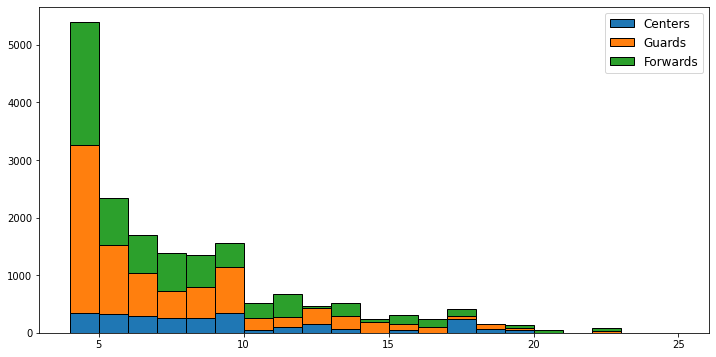

In [8]:
f = plt.figure(figsize=(12, 6))
plt.hist([C_df.CR, G_df.CR, F_df.CR], bins=bins_CR, stacked=True, edgecolor='black')
plt.legend(['Centers', 'Guards', 'Forwards'], fontsize=12)
plt.show()

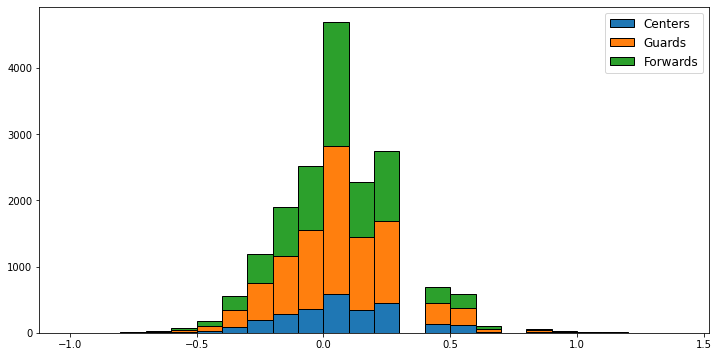

In [9]:
f = plt.figure(figsize=(12, 6))
plt.hist([C_df.PLUS, G_df.PLUS, F_df.PLUS], bins=bins_PLUS, stacked=True, edgecolor='black')
plt.legend(['Centers', 'Guards', 'Forwards'], fontsize=12)
plt.show()

# Split data for the model

In [13]:
df = pd.read_csv(f'{DATA_DIR}/Credits/2018-19.csv')
df.head()

,NAME,POS,TEAM,PDK,DATE,GP,MP,ST,PTS,TRB,AST,STL,BLK,BA,FG,FGA,FG_perc,3P,3PA,3P_perc,FT,FTA,FT_perc,ORB,DRB,TOV,PF,+/-
0,Ivica Zubac,C,LAC,17.0,2019-01-18,1,21.5,0,17,7,1,0,1,1,4,6,0.667,0,0,0.000,9,9,1.0,2,5,0,6,3.0
2,Trae Young,G,ATL,6.0,2019-01-18,1,34.0,1,16,1,7,1,0,2,6,17,0.353,2,9,0.222,2,2,1.0,0,1,6,3,-12.0
3,Thaddeus Young,F,IND,22.8,2019-01-18,1,28.1,1,8,7,4,0,0,0,4,7,0.571,0,1,0.000,0,0,0.0,3,4,0,2,-6.0
4,Guerschon Yabusele,F,BOS,4.3,2019-01-18,1,1.8,0,0,1,0,0,0,0,0,0,0.000,0,0,0.000,0,0,0.0,1,0,0,0,-6.0
5,Delon Wright,G,MEM,20.5,2019-01-18,1,22.8,0,9,1,3,3,2,0,3,6,0.500,1,2,0.500,2,2,1.0,0,1,1,2,7.0
